# Get AudioFile

In [ ]:
! pip install SpeechRecognition

In [ ]:
! pip install -U yt-dlp

In [29]:
import speech_recognition as sr
import os
from time import time

def download(url, fname):
    """
    download wav file from `url` as `fname`
    """
    os.system(f"yt-dlp -P ./data -o '{fname}.%(ext)s' -x --audio-format wav {url}")

def to_text(fname, adjust_for_noise=True):
    r = sr.Recognizer()
    data = sr.AudioFile(fname)  # fname으로부터 wav data load

    with data as source:
        if adjust_for_noise:
            r.adjust_for_ambient_noise(source)  # 공간 소음 캔슬링
        audio = r.record(source)    # recognizer-audio 생성

    print(f'Recognize {fname}')

    start = time()
    text = r.recognize_sphinx(audio)  # recognizing
    print(f'Time elapsed: {time() - start}')

    return text

In [30]:
url = "https://youtu.be/0AavxeP5vgE"
download(url, 'sample')

In [31]:
# speech recognition failed due to length of audio

# Audio Truncation

오디오 길이가 길어질수록 api cost가 늘어나기 때문에 이를 줄이는 방법 제안
- 오디오 음량이 bound 이하로 patience 이상 지속되면 다시 오디오 음량이 bound 이상이 되기 patience 전까지 분량을 제거

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from tqdm import tqdm

In [33]:
freq, data = wavfile.read('data/sample.wav')
data = data[:, 0]

In [34]:
def marking_not_to_cut(data, bound, patience, restore):
    not_to_cut = []
    flag = 0
    for amp in tqdm(data, total=len(data)):
        if flag < patience and abs(amp) < bound:
            not_to_cut.append(True)
            flag += 1
        elif abs(amp) >= bound:
            not_to_cut.append(True)
            # truncated_data.append(amp)
            if flag >= patience:
                not_to_cut[-restore:] = [True] * len(not_to_cut[-restore:])
            flag = 0
        else:
            not_to_cut.append(False)
    return not_to_cut

In [35]:
# bound = np.mean(np.abs(data))
bound = 5500
patience = int(freq * 0.5)

not_to_cut = marking_not_to_cut(data, bound, patience, int(0.1*patience))
truncated_data = data[not_to_cut]

print(f'reduced rate: {(1 - len(truncated_data)/len(data)) * 100}')

100%|██████████| 14882446/14882446 [00:39<00:00, 380906.09it/s]


reduced rate: 25.821938141082455


### Audio Truncation Visualization

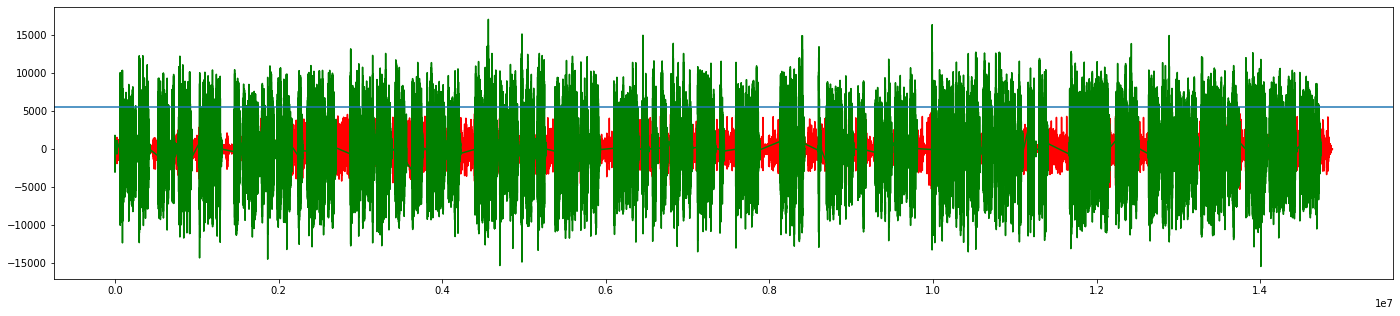

In [36]:
plt.figure(figsize=(24, 5))
plt.plot(np.where(np.logical_not(not_to_cut))[0], data[np.logical_not(not_to_cut)], c='r')
plt.plot(np.where(not_to_cut)[0], data[not_to_cut], c='g')
plt.axhline(bound)

In [37]:
wavfile.write('data/truncated_sample.wav', freq, truncated_data)

# Subtitle Data to Sentences

In [4]:
#@title
text = """
0:01
From using your iPhone as a scanner
0:03
to stacking your favorite Home Screen widgets,
0:05
here are ten helpful iPhone tips you should know.
0:10
Did you accidentally enter a wrong digit into the Calculator?
0:14
No problem.
0:16
Just swipe left or right at the top of the screen
0:18
to erase it.
0:21
Bonus tip: you can copy numbers
0:23
by touching and holding the digits
0:25
and then tapping Copy.
0:27
♪
0:30
Starting in iOS 15, when someone sends you things
0:33
like web links or Apple News articles in Messages,
0:37
you can pin the content so it's easier to find when you need it.
0:41
In a Messages thread,
0:42
touch and hold the item you want to pin
0:46
and then tap Pin.
0:48
Pinned content will be elevated in Messages search,
0:51
the details view of a conversation,
0:54
and apps that support Shared With You.
0:56
♪
0:59
Organize your Home Screen by stacking your widgets.
1:02
Touch and hold an empty space on your Home Screen to edit it.
1:06
Then, drag one widget on top of another of the same size.
1:11
You can add up to ten widgets when creating a stack.
1:15
Tap Done in the upper-right corner when you're done.
1:19
And the widgets will automatically rotate
1:21
to show the most relevant information
1:23
throughout the day.
1:24
You can also swipe through them
1:26
if you want to switch to a different one.
1:27
♪
1:31
Select multiple photos at the same time
1:33
and then add them to other apps with this Multi-Touch gesture.
1:37
Touch and hold a photo until you feel a tap
1:40
and then drag it away a little while still holding it.
1:43
With a different finger,
1:44
tap another photo to add it to the stack.
1:47
You can select as many photos as you like.
1:51
Once you've selected the photos,
1:53
switch to the supported app you want to share to,
1:56
while still holding the stack.
1:58
Drag your finger where you want to add them
2:01
and lift your finger to drop them into the app.
2:03
♪
2:06
If you find yourself typing out the same phrase a lot,
2:09
create a text replacement to get the message across faster.
2:14
in Settings, tap General.
2:16
Then tap Keyboard and tap Text Replacement.
2:21
Tap the Add button in the top-right corner
2:24
and enter a phrase into the Phrase field.
2:28
Then, enter the text replacement you'd like to use
2:31
into the Shortcut field and tap Save.
2:37
Now, whenever you type the text replacement,
2:40
the phrase will appear in the predictive text section
2:43
of your keyboard.
2:44
♪
2:49
You can quickly swipe to open the Camera
2:51
without even having to unlock your screen.
2:54
Just swipe left.
2:55
♪
2:59
Got it!
3:01
Did you know that you can scan a document with the Notes app
3:04
on your iPhone?
3:05
In a note, tap the Camera button and tap Scan Documents.
3:13
Position the document in the viewfinder
3:15
and it will scan automatically.
3:18
Repeat the process with as many pages as you need to scan.
3:22
Tap Save when you're done.
3:24
♪
3:27
Starting in iOS 15, you can use Live Text
3:31
to interact with text using your Camera.
3:34
Just position the viewfinder over a document
3:36
and tap the Scan Text button in the bottom-right corner.
3:40
You can now interact with the text that appears.
3:43
For example, you can tap Select All,
3:46
then tap the screen to see the editing options again,
3:49
and tap Copy.
3:52
Then, switch over to another app
3:55
and paste the text that you just copied.
3:57
♪
4:02
In the Photos app,
4:04
if you're looking for the first photo in an album,
4:06
library, or search results,
4:08
you can quickly jump to the beginning of the view
4:11
by tapping the top edge of your iPhone screen.
4:14
Tap the tab button for the view you're in
4:16
at the bottom of the screen
4:18
to jump back to the most recent photo.
4:20
♪
4:23
You can quickly access Search right on your Home Screen,
4:26
and in iOS 15, your Lock Screen, too.
4:30
Just swipe your finger down from the middle of the Home Screen
4:32
or Lock Screen and a search field will appear.
4:36
Type in what you're looking for to quickly launch an app,
4:39
find a contact, get web search suggestions,
4:42
and more.
4:43
Mmm, Gouda mac and cheese sounds delicious.
4:47
With these helpful tips, you're on your way
4:50
to discovering more of what your iPhone has to offer.
4:53
To learn more about how to use your iPhone,
4:56
subscribe to the Apple Support YouTube channel
4:58
or click another video to keep watching.
5:01
Wikipedia is a registered trademark
5:03
of the Wikimedia Foundation Incorporated,
5:05
a nonprofit organization.
5:07
♪
"""

In [5]:
import re

# find time~script pair
text = re.findall(r'\d+:\d+\n[\w .,?!~]+', text)

# split time and script
text = [script.split('\n') for script in text]
timestamp = [text[0] for text in text]
text = [text[1] for text in text]

In [6]:
text[:10]

['From using your iPhone as a scanner',
 'to stacking your favorite Home Screen widgets,',
 'here are ten helpful iPhone tips you should know.',
 'Did you accidentally enter a wrong digit into the Calculator?',
 'No problem.',
 'Just swipe left or right at the top of the screen',
 'to erase it.',
 'Bonus tip',
 'by touching and holding the digits',
 'and then tapping Copy.']

In [7]:
# make sentences by concatenating following texts
sents = []
tmp = text[0]
for t in text[1:]:
    if tmp[-1] not in '.?!~':
        tmp += ' ' + t
    else:
        sents.append(tmp)
        tmp = t

sents[:10]

['From using your iPhone as a scanner to stacking your favorite Home Screen widgets, here are ten helpful iPhone tips you should know.',
 'Did you accidentally enter a wrong digit into the Calculator?',
 'No problem.',
 'Just swipe left or right at the top of the screen to erase it.',
 'Bonus tip by touching and holding the digits and then tapping Copy.',
 'Starting in iOS 15, when someone sends you things like web links or Apple News articles in Messages, you can pin the content so it In a Messages thread, touch and hold the item you want to pin and then tap Pin.',
 'Pinned content will be elevated in Messages search, the details view of a conversation, and apps that support Shared With You.',
 'Organize your Home Screen by stacking your widgets.',
 'Touch and hold an empty space on your Home Screen to edit it.',
 'Then, drag one widget on top of another of the same size.']

## SentenceTokenizer
[DeepSegment](https://github.com/notAI-tech/deepsegment)  
[NNSplit](https://github.com/bminixhofer/nnsplit)  
음성인식으로 얻은 text는 sentence가 분리되어 있지 않을 것이므로 tokenization 필요

In [8]:
from nltk.tokenize import sent_tokenize

total_text = ' '.join(sents)
total_text = re.sub(r'[.?!~, ]+', ' ', total_text)
total_text = re.sub(r' +', ' ', total_text)
total_text = total_text.lower()
print(total_text)

from using your iphone as a scanner to stacking your favorite home screen widgets here are ten helpful iphone tips you should know did you accidentally enter a wrong digit into the calculator no problem just swipe left or right at the top of the screen to erase it bonus tip by touching and holding the digits and then tapping copy starting in ios 15 when someone sends you things like web links or apple news articles in messages you can pin the content so it in a messages thread touch and hold the item you want to pin and then tap pin pinned content will be elevated in messages search the details view of a conversation and apps that support shared with you organize your home screen by stacking your widgets touch and hold an empty space on your home screen to edit it then drag one widget on top of another of the same size you can add up to ten widgets when creating a stack tap done in the upper and the widgets will automatically rotate to show the most relevant information throughout the 

### DeepSegment

In [ ]:
!pip install -U deepsegment

In [ ]:
!pip install -U keras==2.3.1 tensorflow==2.2.0

In [9]:
from deepsegment import DeepSegment

segment = DeepSegment('en')
segment.segment(total_text)

['from using your iphone as a scanner to stacking your favorite home screen widgets here are ten helpful iphone tips you should know did you accidentally enter a wrong digit into the calculator no problem just swipe left or right at the top of the screen to erase it bonus tip by touching and holding the digits and then tapping copy starting in ios 15 when someone sends you things like web links or apple news articles in messages you can pin the content so it in a messages thread touch and hold the item you want to pin and then tap pin pinned content will be elevated in messages search the details view of a conversation and apps that support shared with you organize your home screen by stacking your widgets touch and hold an empty space on your home screen to edit it then drag one widget on top of another of the same size you can add up to ten widgets when creating a stack tap done in the upper and the widgets will automatically rotate to show the most relevant information throughout th

In [10]:
segment.segment('from using your iphone as a scanner to stacking your favorite home screen widgets here are ten helpful iphone tips you should know did you accidentally enter a wrong digit into the calculator')

['from using your iphone as a scanner to stacking your favorite home screen widgets here are ten helpful iphone tips',
 'you should know',
 'did you accidentally enter a wrong digit into the calculator']

### NNSplit

In [ ]:
!pip install nnsplit

In [21]:
from nnsplit import NNSplit
splitter = NNSplit.load("en")

splits = splitter.split([total_text])[0]

for i, sentence in enumerate(splits, start=1):
   print(f'Sent{i}:\t{sentence}')

Sent1:	from using your iphone as a scanner to stacking your favorite home screen widgets here are ten helpful iphone tips you should know did you accidentally enter a wrong digit into the calculator 
Sent2:	no problem just swipe left or right at the top of the screen to erase it bonus tip by touching and holding the digits and then tapping copy starting in ios 15 
Sent3:	when someone sends you things like web links or apple news articles 
Sent4:	in messages 
Sent5:	you can pin the content so it in a messages thread touch and hold the item you want to pin and then tap pin pinned content will be elevated in messages search 
Sent6:	the details view of a conversation and apps that support shared with you organize your home screen by stacking your widgets touch and hold an empty space on your home screen to edit 
Sent7:	it then drag one widget on top of another of the same size 
Sent8:	you can add up to ten widgets when creating a stack tap done in the upper and the widgets will automatical

# Topic Classifier

[Reference1: Topic CLS](https://towardsdatascience.com/topic-modeling-with-bert-779f7db187e6)

[Reference2: UMAP](https://m.blog.naver.com/myohyun/222421460444)

[Reference3: HDBSCAN](https://godongyoung.github.io/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/2019/07/15/HDBSCAN-%EC%9D%B4%ED%95%B4%ED%95%98%EA%B8%B0-(with-python).html)

## 1. Get embedding vector

In [ ]:
!pip install sentence-transformers
!pip install umap-learn
!pip install hdbscan

In [ ]:
from sentence_transformers import SentenceTransformer, util

# pretrained_model_name = "sentence-transformers/all-mpnet-base-v2"
pretrained_model_name = "distilbert-base-nli-mean-tokens"

model = SentenceTransformer(pretrained_model_name)

model로부터 embedding vector를 구합니다.

In [42]:
embeddings = model.encode(sents)

topic은 시간에 따라서 달라지므로, 이곳 저곳에 다른 topic이 나타나는 결과를 내지 않기 위해 시간 정보를 embedding에 추가합니다.

In [43]:
import numpy as np

time_embedding = np.linspace(1, 5, len(sents))[:, None]
time_embeddings = np.hstack([embeddings, time_embedding])

## 2. Clustering

- UMAP (Uniform Manifold)
  params:
    - n_neighbors: # of nearest neighbor
        lower : local structure
        higher : global structure
    - min_dist : min distance btw points
        smaller : global structure
        larger : local structure

    local structure: low density
    global structure: high density

In [44]:
import umap

umap_embeddings = umap.UMAP(n_neighbors=10,
                            n_components=20,
                            metric='cosine').fit_transform(embeddings)

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


In [47]:
import hdbscan

cluster = hdbscan.HDBSCAN(min_cluster_size=2,
                          metric='euclidean',
                          cluster_selection_method='eom').fit(umap_embeddings)

In [48]:
cluster.labels_

array([0, 2, 1, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 1, 1, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0, 0])

# Semantic Searcher

In [49]:
import torch as th

In [50]:
query = 'widgets on home'
query_embedding = model.encode([query])

In [51]:
scores = util.pytorch_cos_sim(query_embedding, embeddings)[0]
top_n = 3
results = th.topk(scores, k=top_n)

print(f'Query: {query}')
print(f'Best {top_n} results:')
for score, idx in zip(*results):
    idx = idx.item()
    score = score.item()
    print(f'{sents[idx]}: {score}')

Query: widgets on home
Best 3 results:
Organize your Home Screen by stacking your widgets.: 0.7307143211364746
Touch and hold an empty space on your Home Screen to edit it.: 0.6047950387001038
Just swipe your finger down from the middle of the Home Screen or Lock Screen and a search field will appear.: 0.5650277733802795


# Full Pipeline

In [ ]:
import torch as th
from typing import List, Dict, Any, Union, Optional

url = "https://www.youtube.com/watch?v=0AavxeP5vgE"
download(url, 'sample.wav')

def truncate_audio(src: str, fname: str, patience: float):
    freq, data = wavfile.read(src)
    data = data[:, 0]

    #[Warning] 적절한 boundary 계산 전략 필요
    bound = np.mean(abs(data)) + np.std(abs(data))
    patience = int(freq * patience)

    not_to_cut = marking_not_to_cut(data, bound, patience, int(0.1*patience))
    truncated_data = data[not_to_cut]

    print(f'reduced rate: {(1 - len(truncated_data)/len(data)) * 100}')
    wavfile.write(fname, freq, truncated_data)

def sentence_tokenizing(text, tokenizer='nnsplit'):
    if tokenizer=='nnsplit':
        splitter = NNSplit.load("en")
        splits = splitter.split([text])[0]
        sentences = [sent for sent in splits]
    elif tokenizer=='deepsegment':
        segment = DeepSegment('en')
        sentences = segment.segment(total_text)
    else:
        raise ValueError(f'tokenizer: {tokenizer} not found.')

    return sentences

def time_embedding(embeddings):
    time_vector = np.linspace(1,5, len(embeddings))[:, None]
    return th.cat([embeddings, time_vector], dim=-1)

def topic_classification(model: SentenceTransformer,
                         sentences: List[str],
                         umap_kwargs: Dict[str, Any],
                         scan_kwargs: Dict[str, Any]):
    embeddings = model.encode(sentences)
    #[Warning] 적절한 time embedding 벡터 필요
    embeddings = time_embedding(embeddings)

    umap_embeddings = umap.UMAP(**umap_kwargs).fit_transform(embeddings)
    topic_labels = hdbscan.HDBSCAN(**scan_kwargs).fit(umap_embeddings).labels_

    return topic_labels

def topic_grouping(sentences, topics):
    return sentences

# 토픽 cls 필요
def semantic_search(model: SentenceTransformer,
                    pool: List[str],
                    query: str,
                    top_k: int = 3,
                    pool_embeddings: Optional[Union[np.ndarray, th.Tensor]]=None):
    query_embedding = model.encode([query])
    if pool_embeddings is None:
        pool_embeddings = model.encode(pool)

    scores = util.pytorch_cos_sim(query_embedding, pool_embeddings)[0]
    results = th.topk(scores, k=top_k)

    return [{'result': pool[idx], 'score':score} for score, idx in zip(*results)]

## main

In [ ]:
url = "https://youtu.be/0AavxeP5vgE"
pretrained_model_name = "distilbert-base-nli-mean-tokens"
model = SentenceTransformer(pretrained_model_name)

download(url, 'sample')
truncated_data('sample.wav', 'truncated_sample.wav', 0.5)
text = to_text('truncated_sample.wav', adjust_for_noise=True)

# [Warning] 개선 필요
sentences = sentence_tokenizing(text, tokenizer='nnsplit')
topics = topic_classification(model,
                              sentences=sentences,
                              umap_kwargs={'n_neighbors': 10,
                                           'n_components': 20,
                                           'metric': 'cosine'},
                              scan_kwargs={'min_cluster_size': 2,
                                           'metric': 'euclidean',
                                           'cluster_selection_method': 'eom'})

# [Warning] 구현 필요
sentences_group = topic_grouping(sentences, topics)

query = 'widgets on home'
results = semantic_search(model,
                          pool=sentences_group,
                          query=query,
                          top_k=3)

In [8]:
import numpy as np

def tmp(data, bound, patience):
    not_to_cut = []
    count = 0
    for amp in data:
        if amp < bound and count < patience:
            not_to_cut.append(True)
            count += 1
        elif amp >= bound:
            count = 0
            not_to_cut.append(True)
        else:
            not_to_cut.append(False)

    return not_to_cut

In [10]:
d = np.array([9,8,7,6,5,1,1,1,1,1,1])
print(d[tmp(d, 2, 3)])

[9 8 7 6 5 1 1 1]
